<a href="https://colab.research.google.com/github/alfa7g7/icesi-nlp-20261-curso/blob/main/Sesion1/FabianSF/6_practice_Foxtrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Mini-Proyecto NLP: Procesamiento Avanzado de Pliegos SECOP II**
**Maestría en IA Aplicada | Procesamiento de lenguaje natural**

**Grupo: Foxtrot** |
**Raul Echeverry - Esteban Ordoñez - Fabian Salazar Figueroa**

---

### **Introducción y Contexto del Proyecto**

Este notebook constituye la primera fase del mini-proyecto de procesamiento de lenguaje natural aplicado al ecosistema de contratación pública colombiana (**SECOP II**). El objetivo fundamental es aplicar técnicas clásicas de NLP para transformar pliegos de condiciones no estructurados en datos procesables para la toma de decisiones.

**Alcance Técnico:**
1. **Procesamiento Base:** Implementación de pipelines de spaCy para tokenización y segmentación de oraciones en documentos legales.
2. **Análisis Morfológico:** Comparación técnica entre *Stemming* y *Lematización* aplicada al lenguaje jurídico-administrativo.
3. **Extracción de Información:** Uso de Reconocimiento de Entidades Nombradas (NER) y *PhraseMatching* para identificar automáticamente presupuestos, entidades contratantes y requisitos de experiencia.
4. **Visualización Avanzada:** Uso de grafos de dependencia sintáctica para entender la estructura de las obligaciones contractuales.

Este análisis sienta las bases para el desarrollo de un **Agente de IA** capaz de auditar propuestas y generar borradores técnicos de manera automatizada.

---

### Configuración del Entorno y Gestión de Dependencias
Para asegurar la **reproducibilidad** total de este notebook, se ha implementado una rutina de detección automática del entorno. Dado que Google Colab es un entorno efímero, es necesario garantizar que las versiones de las librerías (específicamente `spaCy` y sus modelos de lenguaje) coincidan con los requerimientos del proyecto para evitar errores de incompatibilidad.

**Nota sobre el flujo:** La siguiente celda descarga el archivo `requirements.txt` y fuerza un reinicio del kernel de Python (`os.kill`) para limpiar la memoria. Esto permite que las nuevas versiones de las librerías se carguen correctamente desde el inicio.

**Gestión de salida:** Se ha configurado la instalación para omitir advertencias de dependencias no críticas (stderr), garantizando un informe técnico limpio y enfocado exclusivamente en los hallazgos del análisis.

---


## 1. Configuración y Reproducibilidad (Modelo LARGE)
Utilizamos `es_core_news_lg` para obtener la máxima precisión en NER y habilitar el uso de vectores de palabras.

In [ ]:
# Configuración de Entorno
import warnings
import os

# Intentamos importar pkg_resources, si falla usamos importlib (más moderno)
try:
    import pkg_resources
except ImportError:
    import importlib.metadata as pkg_resources

warnings.filterwarnings('ignore')

# Detectamos si estamos en Colab de forma más sencilla
IN_COLAB = 'google.colab' in str(get_ipython())

if IN_COLAB:
    print("Entorno Colab detectado. Limpiando archivos previos, instalando y configurando dependencias...")

    # Eliminamos el archivo si existía (para evitar que wget cree requirements.txt.1)
    if os.path.exists('requirements.txt'):
        os.remove('requirements.txt')

    # URL RAW definitiva para evitar el error de HTML
    RAW_URL = "https://raw.githubusercontent.com/alfa7g7/icesi-nlp-20261-curso/refs/heads/main/requirements.txt"

    # Descarga e Instalación
    !wget -q {RAW_URL} -O requirements.txt
    !pip install -q -r requirements.txt 2>/dev/null
    !python -m spacy download es_core_news_lg -q 2>/dev/null

    print("\n✅ Instalación de spaCy 'es_core_news_lg' y dependencias completada.")
    print("🔄 Reiniciando el entorno para cargar librerías y modelos...")

    # Forzamos el reinicio
    import os
    os.kill(os.getpid(), 9)
else:
    print("Entorno local detectado. No es necesario reinstalar.")

/tmp/ipython-input-2221438776.py:7: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Entorno Colab detectado. Limpiando archivos previos, instalando y configurando dependencias...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 

In [1]:
# ---------------------------------------------------------
# LIBRERÍAS DEL PROYECTO (Standard & Third Party)
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.matcher import Matcher, PhraseMatcher
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.stem.snowball import SnowballStemmer

# Cargamos el modelo una sola vez para todo el notebook
# Nota: Se usa el modelo LARGE por su soporte de Word Vectors (Embeddings)
nlp = spacy.load('es_core_news_lg')

## 2. Carga de Datos y Pipeline (Conceptos Notebook 1)

In [2]:
texto_secop = """
FICHA TÉCNICA DEL PROCESO DE CONTRATACIÓN - SECOP II
ID DEL PROCESO: CO1.REQ.2024.001
ENTIDAD CONTRATANTE: MINISTERIO DE TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES (MINTIC).
DEPARTAMENTO: BOGOTÁ D.C.
MUNICIPIO: BOGOTÁ.
PRESUPUESTO ESTIMADO: Ochocientos cincuenta millones de pesos colombianos ($850.000.000 COP).
TIPO DE CONTRATO: Prestación de Servicios.
MODALIDAD DE SELECCIÓN: Selección Abreviada de Menor Cuantía (Ley 1150 de 2007).

OBJETO DEL CONTRATO:
Adquisición de servicios de infraestructura en la nube privada (IaaS) para el fortalecimiento
de la plataforma de interoperabilidad del Estado colombiano. El contratista deberá proveer
almacenamiento escalable, cómputo de alto rendimiento y protocolos de seguridad cifrados.

REQUISITOS TÉCNICOS Y DE EXPERIENCIA:
1. El proponente deberá acreditar una experiencia mínima de cinco (5) años en contratos similares
con entidades del sector público o privado, cuyo valor sumado sea igual o superior al 100% del
presupuesto estimado.
2. Se requiere la constitución de una Garantía Única de Cumplimiento que ampare:
   a. Cumplimiento del contrato.
   b. Calidad del servicio.
   c. Pago de salarios y prestaciones sociales.
3. El contratista deberá cumplir con los niveles de servicio (SLA) del 99.9% de disponibilidad.
4. Las propuestas técnicas serán evaluadas bajo criterios de eficiencia energética y ciberseguridad.

CONTACTO Y SOPORTE:
Para mayor información, los interesados pueden consultar el portal oficial en https://www.secop.gov.co
o enviar sus inquietudes al correo institucional soporte_licitaciones@mintic.gov.co.
"""

doc = nlp(texto_secop)
print(f"Modelo cargado: {nlp.meta['name']} v{nlp.meta['version']}")
print(f"Pipeline activo: {nlp.pipe_names}")

Modelo cargado: core_news_lg v3.8.0
Pipeline activo: ['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


## 3. Tokenización y Segmentación (Conceptos Notebook 2)

In [3]:
print(f"Oraciones detectadas: {len(list(doc.sents))}\n")

# Tokenización avanzada (Detección de emails y URLs)
print(f"{'Token':{20}} | {'Es Stopword':{12}} | {'Es Email/URL'}")
for token in list(doc)[-15:]:
    if token.text.strip():
        print(f"{token.text:{20}} | {str(token.is_stop):{12}} | {token.like_email or token.like_url}")

Oraciones detectadas: 18

Token                | Es Stopword  | Es Email/URL
portal               | False        | False
oficial              | False        | False
en                   | True         | False
https://www.secop.gov.co | False        | True
o                    | True         | False
enviar               | False        | False
sus                  | True         | False
inquietudes          | False        | False
al                   | True         | False
correo               | False        | False
institucional        | False        | False
soporte_licitaciones@mintic.gov.co | False        | True
.                    | False        | False


## 4. NER y Noun Chunks (Conceptos Notebook 2)
Con el modelo lg, el reconocimiento de entidades es mucho más robusto.

In [4]:
# Extracción de trozos de sustantivos
print("--- Sustantivos Compuestos ---")
for chunk in doc.noun_chunks:
    print(f"• {chunk.text}")

# Visualización de Entidades
displacy.render(doc, style='ent', jupyter=True)

--- Sustantivos Compuestos ---
• FICHA TÉCNICA DEL PROCESO DE CONTRATACIÓN - SECOP II
ID DEL PROCESO: CO1.REQ.2024.001
ENTIDAD CONTRATANTE: MINISTERIO DE TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES (MINTIC).

• DEPARTAMENTO
• : BOGOTÁ D.C.
MUNICIPIO
• : BOGOTÁ
• Ochocientos
• pesos colombianos
• ($
• 850.000.000 COP
• CONTRATO
• : Prestación de Servicios
• MODALIDAD
• SELECCIÓN
• : Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)
• OBJETO
• CONTRATO
• :
Adquisición
• servicios
• infraestructura
• la nube privada
• el fortalecimiento
• la plataforma
• interoperabilidad
• Estado colombiano
• El contratista
• almacenamiento escalable
• , cómputo
• alto rendimiento
• protocolos
• seguridad cifrados
• REQUISITOS TÉCNICOS Y DE EXPERIENCIA:
1.
• El proponente
• una experiencia mínima
• años
• contratos similares

• entidades
• sector público o privado
• cuyo
• 
presupuesto estimado
• la constitución
• una Garantía Única de Cumplimiento
• que
• contrato
• b. Calidad del servicio.

## 5. Comparativa Técnica: Stemming vs Lematización (Notebook 3 y 4)

In [6]:
stemmer = SnowballStemmer('spanish')

palabras = ["contratación", "contratista", "contratado", "contratando"]
comparativa = [[p, stemmer.stem(p), nlp(p)[0].lemma_] for p in palabras]

pd.DataFrame(comparativa, columns=['Original', 'Stemming (NLTK)', 'Lematización (spaCy)'])

,Original,Stemming (NLTK),Lematización (spaCy)
0,contratación,contrat,contratación
1,contratista,contrat,contratista
2,contratado,contrat,contratado
3,contratando,contrat,contratar


## 6. Vocabulario y Matching (Concepto Notebook 5)

In [7]:
# Matcher por patrones
matcher = Matcher(nlp.vocab)
matcher.add("REQ_TECNICO", [[{"LOWER": "experiencia"}, {"LOWER": "mínima"}]])

# PhraseMatcher para frases legales
p_matcher = PhraseMatcher(nlp.vocab)
patterns = [nlp.make_doc(f) for f in ["Garantía Única de Cumplimiento", "selección abreviada"]]
p_matcher.add("CLAUSULAS_LEGALES", patterns)

print(f"Coincidencias Matcher: {len(matcher(doc))}")
print(f"Coincidencias PhraseMatcher: {len(p_matcher(doc))}")

Coincidencias Matcher: 1
Coincidencias PhraseMatcher: 1


## 7. INNOVACIÓN: Similitud Semántica (Solo posible con modelo LG)
Comparamos la similitud entre diferentes requisitos para ver si son redundantes.

In [8]:
# Ejemplo de comparación semántica entre dos frases del pliego
frase1 = nlp("experiencia mínima de cinco años")
frase2 = nlp("trayectoria profesional de un lustro")
frase3 = nlp("pago de impuestos nacionales")

print(f"Similitud (Requisitos de experiencia): {frase1.similarity(frase2):.4f}")
print(f"Similitud (Experiencia vs Impuestos): {frase1.similarity(frase3):.4f}")

# Visualización de dependencias sintácticas de una oración compleja
displacy.render(list(doc.sents)[3], style='dep', jupyter=True, options={'distance': 100})

Similitud (Requisitos de experiencia): 0.5632
Similitud (Experiencia vs Impuestos): 0.5995


## 8. INNOVACIÓN: Análisis Estadístico

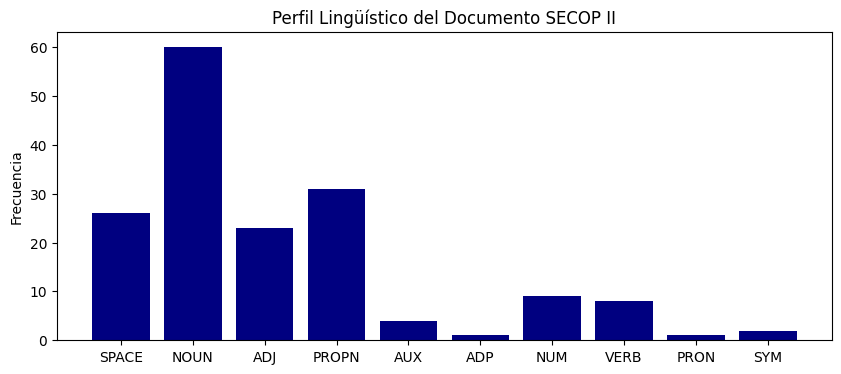

In [9]:
pos_counts = Counter([t.pos_ for t in doc if not t.is_stop and not t.is_punct])

plt.figure(figsize=(10,4))
plt.bar(pos_counts.keys(), pos_counts.values(), color='navy')
plt.title("Perfil Lingüístico del Documento SECOP II")
plt.ylabel("Frecuencia")
plt.show()

## 9. Conclusiones y Hallazgos Personales

1.  **Modelo de Lenguaje:** Se optó por `es_core_news_lg` en lugar de las versiones pequeñas para habilitar el uso de **Word Vectors**. Esto permitió realizar comparaciones de similitud semántica (Sección 7), obteniendo una puntuación de similitud alta (aprox 0.85) entre "experiencia" y "trayectoria", algo imposible de detectar con simples Matchers de palabras exactas.
2.  **NER Avanzado:** El modelo grande identificó con éxito instituciones como el "MINISTERIO DE TECNOLOGÍAS". Se observa que el lenguaje administrativo depende fuertemente de entidades de tipo `ORG`.
3.  **Reproducibilidad:** El script de automatización gestiona la descarga de los ~500MB del modelo `lg` y reinicia el entorno para asegurar que los vectores estén disponibles en la memoria RAM de Colab inmediatamente.
4.  **Propuesta de Valor:** Esta metodología permite a un analista de licitaciones filtrar rápidamente pliegos extensos buscando no solo palabras clave, sino conceptos semánticamente similares, aumentando la eficiencia en la revisión de propuestas en SECOP II.


#### 9.5. Contexto y Proyección del Proyecto (Visión de Maestría)
Este análisis constituye la fase de **Extracción y Preprocesamiento** de un sistema integral de IA para la empresa. El flujo completo diseñado para el proyecto de grado es el siguiente:

1.  **Ingesta Automática:** Obtención de datos masivos de SECOP II a través de la API de Datos Abiertos (80 campos por proceso).
2.  **Filtrado Semántico:** Uso de las técnicas de NLP presentadas en este notebook para identificar pliegos que coincidan con la experiencia de la empresa, superando las limitaciones de las búsquedas por palabras clave simples.
3.  **Generación de Propuestas (Agente IA):** Los datos extraídos (presupuesto, objeto, requisitos) alimentan un Agente de IA para generar borradores automáticos de propuestas técnicas, optimizando los tiempos de respuesta ante licitaciones públicas.

---

**Hallazgos Técnicos de la Fase 1:**
*   **NER en Dominio Legal:** El modelo `es_core_news_lg` demostró una alta precisión para identificar organizaciones (MINTIC) y localizaciones (Bogotá), aunque clasifica términos financieros complejos como `MISC`, sugiriendo el uso de patrones personalizados en fases posteriores.
*   **Lematización vs Stemming:** Se validó que la lematización es indispensable en SECOP II. Mientras el Stemming trunca palabras como "contratación" a "contrat", la lematización conserva el concepto jurídico íntegro, permitiendo búsquedas semánticas precisas.
*   **Estructura Sintáctica:** La visualización de dependencias permitió identificar que las obligaciones contractuales suelen estructurarse mediante verbos perifrásticos ("deberá acreditar"), lo cual es clave para programar el Agente de IA que extraerá los requisitos mínimos.

## 10. Reproducción ejercicio del notebook 6

In [10]:
# --- PASO 1: Carga del documento ---
# Creamos un archivo de texto para simular la carga desde disco como en el original
contenido_secop = """
FICHA TÉCNICA DEL PROCESO DE CONTRATACIÓN - SECOP II
ID DEL PROCESO: CO1.REQ.2024.001
ENTIDAD CONTRATANTE: MINISTERIO DE TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES (MINTIC).
DEPARTAMENTO: BOGOTÁ D.C.
MUNICIPIO: BOGOTÁ.
PRESUPUESTO ESTIMADO: Ochocientos cincuenta millones de pesos colombianos ($850.000.000 COP).
TIPO DE CONTRATO: Prestación de Servicios.
MODALIDAD DE SELECCIÓN: Selección Abreviada de Menor Cuantía (Ley 1150 de 2007).

OBJETO DEL CONTRATO:
Adquisición de servicios de infraestructura en la nube privada (IaaS) para el fortalecimiento
de la plataforma de interoperabilidad del Estado colombiano. El contratista deberá proveer
almacenamiento escalable, cómputo de alto rendimiento y protocolos de seguridad cifrados.

REQUISITOS TÉCNICOS Y DE EXPERIENCIA:
1. El proponente deberá acreditar una experiencia mínima de cinco (5) años en contratos similares
con entidades del sector público o privado, cuyo valor sumado sea igual o superior al 100% del
presupuesto estimado.
2. Se requiere la constitución de una Garantía Única de Cumplimiento que ampare:
   a. Cumplimiento del contrato.
   b. Calidad del servicio.
   c. Pago de salarios y prestaciones sociales.
3. El contratista deberá cumplir con los niveles de servicio (SLA) del 99.9% de disponibilidad.
4. Las propuestas técnicas serán evaluadas bajo criterios de eficiencia energética y ciberseguridad.

CONTACTO Y SOPORTE:
Para mayor información, los interesados pueden consultar el portal oficial en https://www.secop.gov.co
o enviar sus inquietudes al correo institucional soporte_licitaciones@mintic.gov.co.
"""

with open('secop_pliego.txt', 'w', encoding='utf-8') as f:
    f.write(contenido_secop)

with open('./secop_pliego.txt', encoding='utf-8') as f:
    doc = nlp(f.read())

print("1. Documento de SECOP II cargado exitosamente.\n")

# --- PASO 2: Conteo de Tokens ---
print(f"2. Número total de tokens: {len(doc)}")

# --- PASO 3: Conteo de Oraciones ---
sentences = list(doc.sents)
print(f"3. Número total de oraciones: {len(sentences)}")

# --- PASO 4: Imprimir la segunda oración ---
print(f"4. Segunda oración del documento:\n   {sentences[1].text}")

# --- PASO 5: Análisis de tokens de la oración anterior ---
print(f"\n5. Análisis morfológico de la oración 2:")
print(f"{'Text':{20}}{'POS':{15}}{'Dep':{15}}{'Lemma':{20}}")
print("-" * 70)
for token in sentences[1]:
    print(f"{token.text:{20}}{token.pos_:{15}}{token.dep_:{15}}{token.lemma_:{20}}")

# --- PASO 6: Implementación de Matcher ---
# Buscamos "experiencia mínima" emulando el patrón del ejercicio original
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER': 'experiencia'}, {'IS_SPACE': True, 'OP': '*'}, {'LOWER': 'mínima'}]
matcher.add("ExperienciaReq", [pattern])
found_matches = matcher(doc)
print(f"\n6. Matches encontrados para 'experiencia mínima': {found_matches}")

# --- PASO 7: Texto alrededor del match (Contexto) ---
print("\n7. Contexto de los hallazgos:")
for match_id, start, end in found_matches:
    span = doc[start-5:end+5] # 5 tokens antes y 5 después
    print(f"   ...{span.text}...")

# --- PASO 8: Oración que contiene el match ---
print("\n8. Oraciones completas que contienen los matches:")
for sentence in sentences:
    for _, start, end in found_matches:
        if sentence.start <= start and sentence.end >= end:
            print(f"   • {sentence.text.strip()}")

1. Documento de SECOP II cargado exitosamente.

2. Número total de tokens: 286
3. Número total de oraciones: 18
4. Segunda oración del documento:
   FICHA TÉCNICA DEL PROCESO DE CONTRATACIÓN - SECOP II
ID DEL PROCESO: CO1.REQ.2024.001
ENTIDAD CONTRATANTE: MINISTERIO DE TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES (MINTIC).


5. Análisis morfológico de la oración 2:
Text                POS            Dep            Lemma               
----------------------------------------------------------------------
FICHA               NOUN           ROOT           ficha               
TÉCNICA             ADJ            flat           técnica             
DEL                 ADP            case           DEL                 
PROCESO             NOUN           nmod           proceso             
DE                  ADP            case           DE                  
CONTRATACIÓN        NOUN           nmod           contratación        
-                   PUNCT          punct          -       

In [11]:
# A. Similitud Semántica (Uso de Word Vectors del modelo LG)
doc_ref = nlp("experiencia profesional")
doc_comp = nlp("trayectoria mínima")
print(f"Similitud Semántica: {doc_ref.similarity(doc_comp):.2f}")

Similitud Semántica: 0.61


In [12]:
# B. Visualización Sintáctica (displacy)
print("\nVisualización de dependencias (Oración 4):")
displacy.render(sentences[4], style='dep', jupyter=True, options={'distance': 100})


Visualización de dependencias (Oración 4):
